## Predict the employee attrition rate in organizations

### ABOUT CHALLENGE

### Problem statement

Employees certainly are the most important asset of an organization. They are the ones working behind the scenes to ensure that your business functions seamlessly like a well-oiled machine. Hiring the best fit for an organization and ensuring that they stick with the company are two sides of the same coin. Employee attrition not only may lead to a minor hitch in the system, but it is also a major cost to the organization.

The Human Resources department of your organization is determined to predict the employee attrition rate in advance and put a corrective plan of action in place. As a Machine Learning Specialist, the HR team has requested you to build a sophisticated model that predicts the organization’s attrition rate.

### Dataset

The dataset consists of various details such as gender and age of the employee, education and relationship status, pay scale, and other factors that may influence the attrition rate.

The benefits of practicing this problem by using Machine Learning techniques are as follows:

- This challenge will encourage you to apply your Machine Learning skills to build models that can predict employee attrition rates.
- This challenge will help you enhance your knowledge of regression. Regression is one of the basic building blocks of Machine Learning.
We challenge you to build a model that computes the attrition rate for an employee working in an organization.

- Train.csv
- Test.csv
- sample_submission.csv

### Data Description

- __Employee_ID__:	Unique ID of each employee
- __Age__:	Age of each employee
- __Unit__:	Department under which the employee work
- __Education__:	Rating of Qualification of an employee (1-5)
- __Gender__	Male-0 or Female-1
- __Decision_skill_possess__	Decision skill that an employee possesses
- __Post_Level__	Level of the post in an organization (1-5)
- __Relationship_Status__	Categorical Married or Single 
- __Pay_Scale__	Rate in between 1 to 10
- __Time_of_service__	Years in the organization
- __growth_rate__	Growth rate in percentage of an employee
- __Time_since_promotion__	Time in years since the last promotion
- __Work_Life_balance__	Rating for work-life balance given by an employee.
- __Travel_Rate__	Rating based on travel history(1-3)
- __Hometown__	Name of the city
- __Compensation_and_Benefits__	Categorical Variabe
- __VAR1 - VAR5__	Anominised variables
- __Attrition_rate(TARGET VARIABLE)__	Attrition rate of each employee

### Submission format
You are required to write your predictions in a .csv file that contain the following columns:

Employee_ID

Attrition_rate

### Evaluation criteria
The evaluation metric that is used for this problem is the root mean squared error. The formula is as follows:
 
 score = 100 * max(0,1 - root_mean_squared_error(actual_values,predicted_values))

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
#Import visualization libraries
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [2]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [3]:
train = pd.read_csv('./Dataset/Train.csv')
pd.set_option('display.max_columns', None)
print(train.columns)
print(train.head())
train_data = train
train_data.shape

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')
  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT          

(7000, 24)

In [4]:
#Read the test datasets
test = pd.read_csv('./Dataset/Test.csv')
pd.set_option('display.max_columns', None)
print(test.columns)
print(test.head())
test_data = test
test_data.shape

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')
  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_22713      F  32.0                5              Single  Springfield   
1    EID_9658      M  65.0                2              Single      Lebanon   
2   EID_22203      M  52.0                3             Married  Springfield   
3    EID_7652      M  50.0                5              Single   Washington   
4    EID_6516      F  44.0                3             Married     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7

(3000, 23)

In [5]:
#We have 7000 train set and 3000 test set
# Exploratory data Analysis on Train data
#'Employee_ID'
# We can drop this column as it is an id column and does not add value to our model
train_data = train_data.drop('Employee_ID',1)

In [6]:
# 'Gender' 
print('Distribution of Gender:',train_data['Gender'].value_counts()) #Distribution of the cateogorical variable
print('Missing values:',train_data['Gender'].isnull().sum()) #Check for missing value
#There are no missing values we need not treat missing values
# As we are trying to implement Linear model we can one-hot encode the variable
train_data = pd.get_dummies(train_data,columns = ['Gender'],prefix =['Gender'])

Distribution of Gender: F    4114
M    2886
Name: Gender, dtype: int64
Missing values: 0


In [7]:
# 'Age' : Age of each employee in years
print('Missing values:',train_data['Age'].isnull().sum()) #Check for missing value
# Checking if Age differes with Unit
print('Average Age in company:',train_data['Age'].mean())
print(train_data.groupby('Unit', as_index=False)['Age'].mean())
#Looks like the Average Age in the company is close to the Unit Averages so replacing the missing values with average age of the company
train_data['Age'].fillna((train_data['Age'].mean()), inplace=True)

Missing values: 412
Average Age in company: 39.62279902853673
                         Unit        Age
0      Accounting and Finance  39.051724
1   Human Resource Management  39.574534
2                          IT  39.816171
3                   Logistics  39.680870
4                   Marketing  41.492386
5                  Operarions  39.466063
6                  Production  38.275000
7                  Purchasing  39.486430
8                     Quality  38.803279
9                         R&D  39.681890
10                      Sales  39.985442
11                   Security  38.333333


In [8]:
# 'Time_of_service' : Time_of_service of each employee in years
print('Missing values:',train_data['Time_of_service'].isnull().sum()) #Check for missing value
# Checking if Time_of_service differes with Unit
print('Average Time_of_service in company:',train_data['Time_of_service'].mean())
print(train_data.groupby('Unit', as_index=False)['Time_of_service'].mean())
#Looks like the Average Time_of_service in the company is close to the Unit Averages so replacing the missing values with average Time_of_service of the company
train_data['Time_of_service'].fillna((train_data['Time_of_service'].mean()), inplace=True)

Missing values: 144
Average Time_of_service in company: 13.385064177362894
                         Unit  Time_of_service
0      Accounting and Finance        13.057026
1   Human Resource Management        12.816568
2                          IT        13.430972
3                   Logistics        13.597893
4                   Marketing        14.278049
5                  Operarions        13.230329
6                  Production        13.351220
7                  Purchasing        13.449393
8                     Quality        13.391534
9                         R&D        13.475188
10                      Sales        13.458963
11                   Security        12.051471


Missing values: 0


(array([ 162.,    0., 1819.,    0.,    0., 1811.,    0., 1703.,    0.,
        1505.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

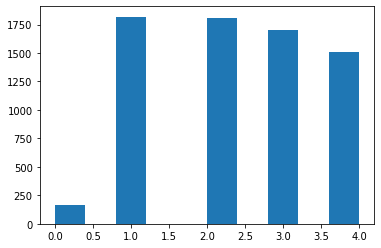

In [9]:
# 'Time_since_promotion' : Time in years since the last promotion
print('Missing values:',train_data['Time_since_promotion'].isnull().sum()) #Check for missing value
plt.hist(train_data['Time_since_promotion'])

Missing values: 0


(array([755., 631., 758., 631., 631., 780., 636., 794., 652., 732.]),
 array([20. , 25.4, 30.8, 36.2, 41.6, 47. , 52.4, 57.8, 63.2, 68.6, 74. ]),
 <a list of 10 Patch objects>)

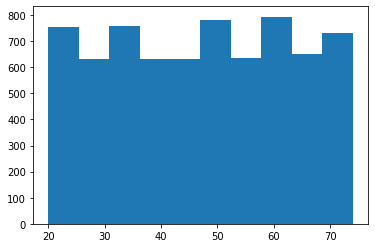

In [10]:
# 'growth_rate' : Growth rate in percentage of an employee
print('Missing values:',train_data['growth_rate'].isnull().sum()) #Check for missing value
plt.hist(train_data['growth_rate'])

Missing values: 0


(array([2224.,    0.,    0.,    0.,    0., 3827.,    0.,    0.,    0.,
         949.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

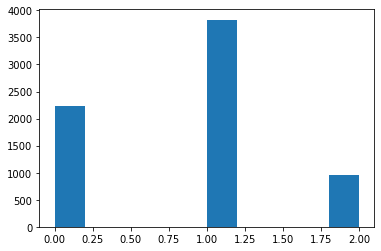

In [11]:
# 'Travel_Rate' : Rating based on travel history(1-3)
print('Missing values:',train_data['Travel_Rate'].isnull().sum()) #Check for missing value
plt.hist(train_data['Travel_Rate'])

Missing values: 0


(array([1035.,    0., 1786.,    0.,    0., 2435.,    0., 1046.,    0.,
         698.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

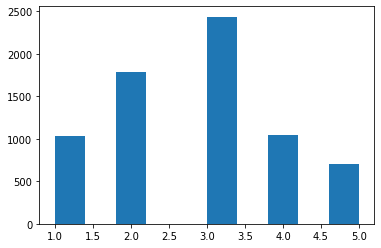

In [12]:
# 'Post_Level' : Level of the post in an organization (1-5)
print('Missing values:',train_data['Post_Level'].isnull().sum()) #Check for missing value
plt.hist(train_data['Post_Level'])

In [13]:
#Pay_Scale: Rate in between 1 to 10
print('Missing values:',train_data['Pay_Scale'].isnull().sum()) #Check for missing value
print(train_data.groupby('Unit')['Pay_Scale'].mean()) #Check pay scale by Unit
print("Average_Pay_Scale",train_data['Pay_Scale'].mean())
#Looks like the Average Pay_Scale in the company is close to the Unit Averages so replacing the missing values with average Pay_Scale of the company
train_data['Pay_Scale'].fillna((train_data['Pay_Scale'].mean()), inplace=True)

Missing values: 9
Unit
Accounting and Finance       6.042339
Human Resource Management    6.072674
IT                           5.956210
Logistics                    5.979470
Marketing                    6.075472
Operarions                   6.085227
Production                   5.990521
Purchasing                   6.081349
Quality                      6.170984
R&D                          5.939706
Sales                        5.979809
Security                     5.965278
Name: Pay_Scale, dtype: float64
Average_Pay_Scale 6.0062938063224145


In [14]:
# 'Compensation_and_Benefits'
print('Distribution of Compensation_and_Benefits:',train_data['Compensation_and_Benefits'].value_counts()) #Distribution of the cateogorical variable
print('Missing values:',train_data['Compensation_and_Benefits'].isnull().sum()) #Check for missing value
#There are no missing values we need not treat missing values
# As we are trying to implement Linear model we can one-hot encode the variable
train_data = pd.get_dummies(train_data,columns = ['Compensation_and_Benefits'],prefix =['Compensation_and_Benefits'])

Distribution of Compensation_and_Benefits: type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64
Missing values: 0


In [15]:
#Work_Life_balance: Rating for work-life balance given by an employee.
print('Missing values:',train_data['Work_Life_balance'].isnull().sum())
print("Average_Work_Life_balance",train_data['Work_Life_balance'].mean())
print(train_data.groupby('Unit')['Work_Life_balance'].mean()) #Check pay scale by Unit
#Looks like the Average Work_Life_balance in the company is close to the Unit Averages so replacing the missing values with average Work_Life_balance of the company
train_data['Work_Life_balance'].fillna((train_data['Work_Life_balance'].mean()), inplace=True)

Missing values: 11
Average_Work_Life_balance 2.3878952639862643
Unit
Accounting and Finance       2.458586
Human Resource Management    2.299419
IT                           2.418103
Logistics                    2.389411
Marketing                    2.438679
Operarions                   2.345609
Production                   2.347619
Purchasing                   2.396000
Quality                      2.290155
R&D                          2.314706
Sales                        2.412951
Security                     2.527778
Name: Work_Life_balance, dtype: float64


Average_VAR2 -0.008125969173281976
Unit
Accounting and Finance       0.031625
Human Resource Management   -0.099321
IT                          -0.004438
Logistics                    0.053069
Marketing                    0.047361
Operarions                  -0.041061
Production                  -0.113668
Purchasing                   0.020401
Quality                     -0.050649
R&D                         -0.025951
Sales                       -0.033591
Security                    -0.027524
Name: VAR2, dtype: float64


C:\Users\kanum\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kanum\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


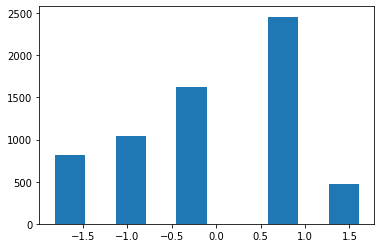

In [16]:
train_data['VAR2'].isnull().sum()
plt.hist(train_data["VAR2"])
print("Average_VAR2",train_data['VAR2'].mean())
print(train_data.groupby('Unit')['VAR2'].mean()) #Check pay scale by Unit
train_data['VAR2'].fillna((train_data['VAR2'].mean()), inplace=True)

Average_VAR4 1.891078184110971
Unit
Accounting and Finance       1.906250
Human Resource Management    1.917197
IT                           1.866983
Logistics                    1.903226
Marketing                    1.834197
Operarions                   1.893312
Production                   1.840206
Purchasing                   1.859611
Quality                      1.898305
R&D                          1.931707
Sales                        1.896752
Security                     1.932331
Name: VAR4, dtype: float64


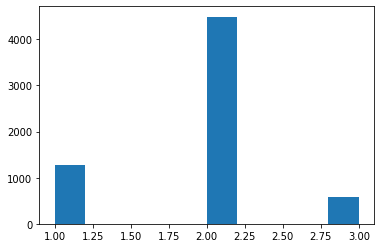

In [17]:
train_data['VAR4'].isnull().sum()
plt.hist(train_data["VAR4"])
print("Average_VAR4",train_data['VAR4'].mean())
print(train_data.groupby('Unit')['VAR4'].mean()) #Check pay scale by Unit
train_data['VAR4'].fillna((train_data['VAR4'].mean()), inplace=True)

Missing values: 0


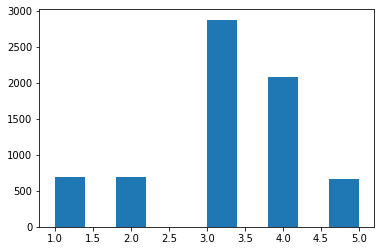

In [18]:
#'Education_Level' : Rating of Qualification of an employee (1-5)
# Make a histogram of all the ratings in the average_rating column.
plt.hist(train_data["Education_Level"])
print('Missing values:',train_data['Education_Level'].isnull().sum())
# Show the plot.plt.show()

In [19]:
# 'Relationship_Status'
print('Distribution of Relationship_Status:',train_data['Relationship_Status'].value_counts()) #Distribution of the cateogorical variable
print('Missing values:',train_data['Relationship_Status'].isnull().sum()) #Check for missing value
#There are no missing values we need not treat missing values
# As we are trying to implement Linear model we can one-hot encode the variable
train_data = pd.get_dummies(train_data,columns = ['Relationship_Status'],prefix =['Relationship_Status'])

Distribution of Relationship_Status: Married    4520
Single     2480
Name: Relationship_Status, dtype: int64
Missing values: 0


In [20]:
# 'Hometown'
print('Distribution of Hometown:',train_data['Hometown'].value_counts()) #Distribution of the cateogorical variable
print('Missing values:',train_data['Hometown'].isnull().sum()) #Check for missing value
#There are no missing values we need not treat missing values
# As we are trying to implement Linear model we can one-hot encode the variable
train_data = pd.get_dummies(train_data,columns = ['Hometown'],prefix =['Hometown'])

Distribution of Hometown: Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64
Missing values: 0


In [21]:
# 'Unit'
print('Distribution of Unit:',train_data['Unit'].value_counts()) #Distribution of the cateogorical variable
print('Missing values:',train_data['Unit'].isnull().sum()) #Check for missing value
#There are no missing values we need not treat missing values
# As we are trying to implement Linear model we can one-hot encode the variable
train_data = pd.get_dummies(train_data,columns = ['Unit'],prefix =['Unit'])

Distribution of Unit: IT                           1394
Logistics                    1173
Sales                         943
Operarions                    706
R&D                           680
Purchasing                    504
Accounting and Finance        496
Human Resource Management     344
Marketing                     212
Production                    211
Quality                       193
Security                      144
Name: Unit, dtype: int64
Missing values: 0


In [22]:
# 'Decision_skill_possess'
print('Distribution of Unit:',train_data['Decision_skill_possess'].value_counts()) #Distribution of the cateogorical variable
print('Missing values:',train_data['Decision_skill_possess'].isnull().sum()) #Check for missing value
#There are no missing values we need not treat missing values
# As we are trying to implement Linear model we can one-hot encode the variable
train_data = pd.get_dummies(train_data,columns = ['Decision_skill_possess'],prefix =['Decision_skill_possess'])

Distribution of Unit: Conceptual    1756
Analytical    1755
Directive     1753
Behavioral    1736
Name: Decision_skill_possess, dtype: int64
Missing values: 0


In [23]:
train_data.head(5)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Gender_F,Gender_M,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
X= train_data.drop('Attrition_rate',1)
y = train_data.Attrition_rate

In [32]:
X.head(5)
y.head(5)

0    0.1841
1    0.0670
2    0.0851
3    0.0668
4    0.1827
Name: Attrition_rate, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size =0.3, random_state = 24)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4900, 46)
(4900,)
(2100, 46)
(2100,)


In [58]:
#Implementing Lasso Regression
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 1.0,selection = 'random')
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
def score(y_test,y_pred):
    return 100*max(0,1-mean_squared_error(y_test,y_pred))

In [60]:
score(Y_test,Y_pred)

96.75299060152666

In [61]:
#Treating Test data
test_data = test
test_data = test_data.drop('Employee_ID',1)
test_data = pd.get_dummies(test_data)
#Replacing missing values in test with mean
test_data.fillna(test_data.mean(),inplace = True)
test_data.isnull().sum()
test_data.head(5)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [62]:
test_predict = lasso.predict(test_data)

In [63]:
test_predict.shape

(3000,)

In [64]:
submission=pd.DataFrame(test_predict, columns=['Attrition_rate']) 

In [65]:
submission['Employee_ID']= test['Employee_ID']
submission.head(2)

,Attrition_rate,Employee_ID
0,0.192173,EID_22713
1,0.192173,EID_9658


In [66]:
pd.DataFrame(submission,columns = ['Employee_ID','Attrition_rate']).to_csv('Lasso.csv',index = False)